<a href="https://colab.research.google.com/github/s-harish1/ml-2022-harish.s/blob/main/Lab_18_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Many to Many RNNs

These types of networks take a sequence as an input and give a sequence as an output. It can be used in problems like machine translation, named entity recognition, POS tagging and others.

In this project you would work on different types of RNNs on the task of POS tagging. 

In [1]:
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [2]:
## We will use Treebank from NLTK as dataset
from nltk.corpus import treebank
from nltk.corpus import brown

In [3]:
# load POS tagged corpora from NLTK
treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + brown_corpus


In [4]:
print("Number of sentences: " + str(len(tagged_sentences)))
tagged_sentences[0]

Number of sentences: 61254


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET'),
 ('board', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('nonexecutive', 'ADJ'),
 ('director', 'NOUN'),
 ('Nov.', 'NOUN'),
 ('29', 'NUM'),
 ('.', '.')]

This is a many-to-many problem, each data point will be a different sentence of the corpora.

Each data point will have multiple words in the input sequence. This is what we will refer to as X.

Each word will have its correpsonding tag in the output sequence. This what we will refer to as Y.



In [5]:
X = [] # store input sequence
Y = [] # store output sequence

for sentence in tagged_sentences:
    X_sentence = []
    Y_sentence = []
    for entity in sentence:         
        X_sentence.append(entity[0])  # entity[0] contains the word
        Y_sentence.append(entity[1])  # entity[1] contains corresponding tag
        
    X.append(X_sentence)
    Y.append(Y_sentence)


In [6]:
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))


In [7]:
print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))

Total number of tagged sentences: 61254
Vocabulary size: 53232
Total number of tags: 12


In [8]:
## Task - 1
## Vectorize each sentence and pad each sequence to a fixed length
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))
print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))
print("Length of first input sequence  : {}".format(len(X[0])))
print("Length of first output sequence : {}".format(len(Y[0])))                     


Total number of tagged sentences: 61254
Vocabulary size: 53232
Total number of tags: 12
Length of first input sequence  : 18
Length of first output sequence : 18


In [9]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [10]:
word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(X)                    # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences(X)      # use the tokeniser to encode input sequence                               

In [11]:
## Task - 2 
## Convert Y to categorical and pad it as input
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)

In [14]:
## Padding
#X_encoded is the encoded form X from Task-1
MAX_SEQ_LENGTH = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post") # Pad for Y
X, Y = X_padded, Y_padded


In [19]:
# Change Y to categorical 
Y = to_categorical(Y)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [36]:
### Split data in training and testing 
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)

In [37]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))


TRAINING DATA
Shape of input sequences: (52065, 100)
Shape of output sequences: (52065, 100, 13)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (9189, 100)
Shape of output sequences: (9189, 100, 13)


In [38]:
NUM_CLASSES = Y.shape[2]

In [24]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model

In [39]:
X[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  5594, 21728,     2,  9068,   105,   158,     2,    53,
        1748,     1,   344,    18,     7, 13148,   880,  2681,  4000,
           3], dtype=int32)

In [ ]:
### Task - 3 Complete the two lines

In [40]:
rnn_model = Sequential()

# create embedding layer - usually the first layer in text problems
rnn_model.add(Embedding(num_words + 1,         # vocabulary size - number of unique words in data
                        output_dim    =  300,          # length of vector with which each word is represented
                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                        trainable     =  False                    # False - don't update the embeddings
))

# add an any RNN layer which contains 64 RNN cells
rnn_model.add(SimpleRNN(64, 
              return_sequences=True ))

# add time distributed (output at each sequence) layer
rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [41]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])


In [42]:
rnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          15969900  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 64)           23360     
                                                                 
 time_distributed_1 (TimeDis  (None, 100, 13)          845       
 tributed)                                                       
                                                                 
Total params: 15,994,105
Trainable params: 24,205
Non-trainable params: 15,969,900
_________________________________________________________________


In [43]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=256, epochs=10)


Epoch 1/10
204/204 [==============================] - 34s 163ms/step - loss: 0.6030 - acc: 0.8291
Epoch 2/10
204/204 [==============================] - 33s 160ms/step - loss: 0.3761 - acc: 0.8859
Epoch 3/10
204/204 [==============================] - 33s 161ms/step - loss: 0.2923 - acc: 0.9106
Epoch 4/10
204/204 [==============================] - 33s 161ms/step - loss: 0.2419 - acc: 0.9259
Epoch 5/10
204/204 [==============================] - 32s 159ms/step - loss: 0.2106 - acc: 0.9349
Epoch 6/10
204/204 [==============================] - 33s 160ms/step - loss: 0.1896 - acc: 0.9406
Epoch 7/10
204/204 [==============================] - 32s 157ms/step - loss: 0.1737 - acc: 0.9450
Epoch 8/10
204/204 [==============================] - 33s 160ms/step - loss: 0.1614 - acc: 0.9481
Epoch 9/10
204/204 [==============================] - 32s 158ms/step - loss: 0.1521 - acc: 0.9506
Epoch 10/10
204/204 [==============================] - 34s 169ms/step - loss: 0.1450 - acc: 0.9524


In [30]:
from matplotlib import pyplot as plt

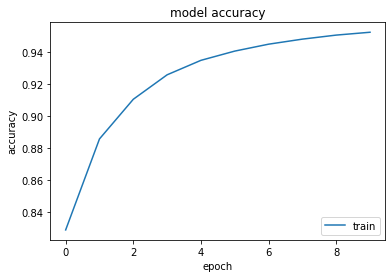

In [46]:
plt.plot(rnn_training.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()


In [32]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

288/288 [==============================] - 5s 15ms/step - loss: 0.1450 - acc: 0.9528
Loss: 0.14504817128181458,
Accuracy: 0.9527554512023926


In [47]:
## Task - 4 How did turning the trainable parameter in Embedding layer into True effect the performance?
#Embeddings get updated

In [48]:
## Task - 5 How else can you improve the accuracy?
#Add more layers and increase no of epochs or batch size(but kepp them balanced)

In [ ]:
## Task - 6 Use other RNNs present in Keras like LSTM, GRU, BiLSTMs, BiGRU and compare any three models with RNNs 